# Preprocessing data

## Some package imports

In [89]:
!pip install -U -q datalearn19intro
import pandas as pd
from datalearn19intro import get_accounts, get_events, get_subscriptions, get_users
%matplotlib inline

## Reading the data

In [20]:
accounts = get_accounts()
users = get_users()
events = get_events()
subscriptions = get_subscriptions()

In [4]:
accounts_file_id = '1SFFGL_FIq3-l6CP9MTe9ueuLRMz_tvrw' # you can see it with "get sherable link"
downloaded = drive.CreateFile({'id': accounts_file_id})
downloaded.GetContentFile('accounts.csv')  
accounts = pd.read_csv('accounts.csv')
accounts.head()

,account_id,marketing_source,marketing_referrer,created_at,plan_id,trial_start,started_plan_at,signup_box_origin,churn_state,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,is_gmail,has_logo,free_users,marketing_banner,device,os,browser,collection_21_days,trial_period,company_size,next_charge_date,last_upgrade_promotion_start,cs_agent,sales_agent,disabled,payment_currency,disable_promotion,max_team_size,min_team_size,cancellation_on_renewal_date,partner_id,industry,billed_users_count,utm_cluster_id,pricing_version,has_domain,mrr,lead_score,industry.1,team_size,user_goal,user_description,sub_industry
0,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,NaN,2019-01-01,NaN,NaN,none,NaN,NaN,11.0,New South Wales,AU,NaN,0,1,1,NaN,NaN,desktop,windows,microsoft edge,0,14,NaN,NaN,NaN,NaN,NaN,NaN,AUD,0,5.0,2.0,NaN,NaN,NaN,0,orders,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2793497,NaN,NaN,2019-01-01,NaN,2019-01-01,NaN,mobile_app,none,NaN,NaN,NaN,New Jersey,US,NaN,0,1,1,NaN,NaN,mobile,ios,NaN,0,14,NaN,NaN,NaN,NaN,NaN,NaN,USD,0,5.0,2.0,NaN,NaN,NaN,0,NaN,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2793498,adwordsverticals,https://www.google.com/,2019-01-01,NaN,2019-01-01,NaN,NaN,none,NaN,NaN,-6.0,Louisiana,US,NaN,0,1,1,NaN,NaN,desktop,windows,chrome,0,14,NaN,NaN,NaN,NaN,NaN,NaN,USD,0,1.0,1.0,NaN,NaN,Other,0,todos,3,0,NaN,0,Other,1,NaN,NaN,NaN
3,2793499,NaN,NaN,2019-01-01,NaN,2019-01-01,NaN,mobile_app,none,NaN,NaN,NaN,Tel Aviv,IL,NaN,0,1,1,NaN,NaN,mobile,android,NaN,0,14,NaN,NaN,NaN,NaN,NaN,NaN,USD,0,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2793500,adwordsyoutube,https://www.youtube.com/,2019-01-01,NaN,2019-04-04,NaN,NaN,none,NaN,NaN,-5.0,North Carolina,US,NaN,0,1,1,NaN,NaN,desktop,chrome_os,chrome,0,14,NaN,NaN,NaN,NaN,NaN,NaN,USD,0,1.0,1.0,NaN,NaN,Design,0,todos,3,0,NaN,0,Design,1,NaN,NaN,NaN


In [21]:
df = \
         pd.merge(pd.merge(accounts, users, on = 'account_id', how = 'outer', suffixes = ('_fromaccounts', '_fromusers')),
         pd.merge(events, subscriptions, on = 'account_id', how = 'outer', suffixes = ('_fromevents', '_fromsubscriptions')),
         how = 'outer', on = ['user_id', 'account_id'])

In [22]:
df.shape

(11687, 108)

In [23]:
n_rows = len(df)
n_cols = len(df.columns)

In [107]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [41]:
joined_data.head(4)

,account_id,marketing_source,marketing_referrer,created_at_fromaccounts,plan_id_x,trial_start,started_plan_at,signup_box_origin,churn_state,churn_date,churn_reason,time_diff_fromaccounts,region_fromaccounts,country_fromaccounts,subscription_started_at,...,empty_events,event_date,plan_id_y,event_type,invoice_charge_amount,prev_plan_id,status,status_reason,currency,invoice_charge_amount_usd,mrr_gain,subscription_id,next_charge_date_y,payment_type,transaction_date
0,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,...,7.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
1,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,...,0.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
2,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,...,0.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
3,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,...,0.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN


In [51]:
# joined_data.nunique()

**Notice:** Because of the join operation we now have much more rows than accounts, which are the actual entries in our dataset. We will see how to get back to one-row-per-account soon.

# Imputation

## Dropping featues with too much missing data

`dropna()` is an important `pandas` method. Use `axis=1` to drop columns and `axis=0`; `how` can be used to drop a row or column if it has `any` or `all` missing values. Use `thresh` to define an integer threshold for **non-missing** values instead.

In [28]:
import math

In [29]:
AT_LEAST_NON_MISSING_PERCENT = 0.7  # require at most 30% missing values per feature

In [30]:
AT_LEAST_NON_MISSING = math.floor(AT_LEAST_NON_MISSING_PERCENT * len(df))
AT_LEAST_NON_MISSING

8180

In [31]:
df.dropna(axis=1, thresh=AT_LEAST_NON_MISSING, inplace=True)

In [32]:
len(df.columns)

64

In [33]:
print("{} columns dropped.".format(n_cols - len(df.columns)))

44 columns dropped.


We went from 108 to 64 features!

## Dropping rows with too much missing data

In [34]:
AT_LEAST_NON_MISSING_PERCENT_ROWS = 0.5  # require at most 50% missing values per row

In [35]:
AT_LEAST_NON_MISSING_ROW = math.floor(AT_LEAST_NON_MISSING_PERCENT_ROWS * len(df.columns))
AT_LEAST_NON_MISSING_ROW

32

In [36]:
df.dropna(axis=0, thresh=AT_LEAST_NON_MISSING_ROW, inplace=True)

In [37]:
len(df)

11422

In [39]:
print("{} rows dropped.".format(n_rows - len(df)))

265 rows dropped.


## Dummy "missing" flag

In [54]:
df.nunique()[df.nunique() < 11]

created_at_fromaccounts     1
churn_state                 2
paying                      2
is_gmail_fromaccounts       2
has_logo                    1
device_fromaccounts         3
os_fromaccounts             6
browser_fromaccounts        7
trial_period                1
payment_currency            5
disable_promotion           2
max_team_size               9
min_team_size              10
billed_users_count          8
pricing_version             1
has_domain                  2
lead_score                  2
is_admin                    2
pending                     2
enabled                     2
has_photo                   1
device_fromusers            3
os_fromusers                6
is_gmail_fromusers          2
gender                      2
has_phone                   1
notification_events        10
dtype: int64

In [62]:
df.browser_fromaccounts.value_counts()

chrome               6725
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

We won't see missing value counts like this. We need to add an argument:

In [63]:
df.browser_fromaccounts.value_counts(dropna=False)

chrome               6725
NaN                  1727
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

One option is to put a special flag for missing:

In [70]:
filled_browser = df.browser_fromaccounts.fillna('missing')

In [71]:
filled_browser.value_counts()

chrome               6725
missing              1727
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

But in this case, just putting this into the `generic browser` category might not be a bad idea.

In [72]:
filled_browser = df.browser_fromaccounts.fillna('generic browser')

In [73]:
filled_browser.value_counts()

chrome               6725
generic browser      2497
safari               1268
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

Let's just go with `missing` for this one, though...

In [74]:
df.browser_fromaccounts = df.browser_fromaccounts.fillna('missing')

In [75]:
df.browser_fromaccounts.value_counts()

chrome               6725
missing              1727
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

## Filling missing value with the mean/median/mode...

Let's find a numerical feature with enough missing data...

In [87]:
df.columns[(df.nunique() > 50) & (df.isna().sum() > 50)]

Index(['marketing_referrer', 'region_fromaccounts', 'country_fromaccounts',
       'became_active_at', 'city', 'region_fromusers', 'country_fromusers',
       'campaign_id', 'first_user_in_account_id', 'total_events',
       'column_events', 'raw_events', 'non_communicating_events', 'web_events',
       'ios_events', 'android_events', 'desktop_app_events'],
      dtype='object')

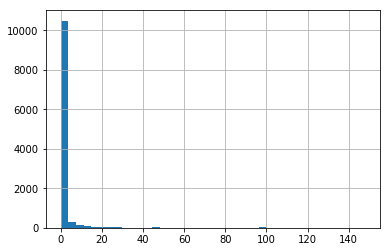

In [91]:
df.raw_events.hist(bins=40)

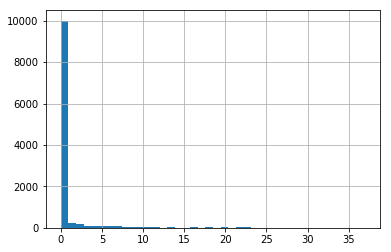

In [94]:
df.raw_events[df.raw_events<40].hist(bins=40)

In [93]:
df.raw_events.isna().sum()

99

In [95]:
df.raw_events.mean()

1.532456062880862

This is an integer feature, though! No sense in putting a real number as a stand-in. Let's look at the mode and median instead. Recall these are outlier-robust and skewness-robust statistics, and the distribution above seems very skewed...

In [98]:
df.raw_events.median()

0.0

In [97]:
df.raw_events.mode()

0   0.00
dtype: float64

Filling missing values with zeros makes **a lot** of sense, in this case.

In [100]:
df.raw_events.fillna(value=0, inplace=True)

In [101]:
df.raw_events.isna().sum()

0

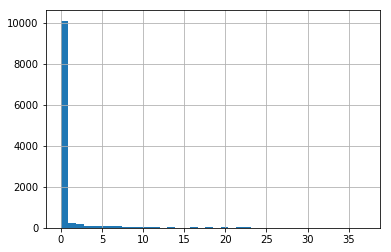

In [102]:
df.raw_events[df.raw_events<40].hist(bins=40)

#### Back to the presentation! We now discuss feature engineering...

# Scaling and normalization

Let's find a numeric feature to scale.

In [105]:
ndf = df.select_dtypes('number')

In [108]:
ndf.head(4)

,account_id,time_diff_fromaccounts,paying,is_gmail_fromaccounts,has_logo,collection_21_days,trial_period,disable_promotion,max_team_size,min_team_size,billed_users_count,pricing_version,has_domain,lead_score,user_id,is_admin,pending,enabled,time_diff_fromusers,serial_number,has_photo,is_gmail_fromusers,campaign_id,first_user_in_account_id,has_phone,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events
0,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,33.00,0.00,0.00,0.00,7.00
1,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [110]:
ndf.describe()

,account_id,time_diff_fromaccounts,paying,is_gmail_fromaccounts,has_logo,collection_21_days,trial_period,disable_promotion,max_team_size,min_team_size,billed_users_count,pricing_version,has_domain,lead_score,user_id,is_admin,pending,enabled,time_diff_fromusers,serial_number,has_photo,is_gmail_fromusers,campaign_id,first_user_in_account_id,has_phone,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events
count,"11,422.00","9,686.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","9,260.00","9,260.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","9,036.00","11,422.00","11,422.00","11,422.00","9,024.00","9,637.00","11,422.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,422.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00"
mean,"2,794,045.76",2.09,0.16,0.57,1.00,68.28,14.00,0.08,35.32,22.59,0.87,3.00,0.47,0.05,"6,201,831.57",0.69,0.16,0.83,0.82,4.81,1.00,0.61,"3,932,275.26","28,730,413.27",1.00,48.39,3.67,0.20,0.50,0.40,1.52,0.15,0.09,0.47,0.04,0.50,0.15,0.45,0.39,9.56,34.41,4.51,2.48,1.39,1.87
std,268.15,5.79,0.37,0.49,0.00,235.96,0.00,0.26,110.62,86.59,2.37,0.00,0.50,0.22,"154,866.13",0.46,0.36,0.38,5.64,9.94,0.00,0.49,"458,342.91","4,413,968.53",0.00,150.24,22.54,1.24,1.54,1.54,8.10,1.57,1.72,1.62,0.51,1.37,1.04,1.81,1.78,46.11,135.34,38.13,17.50,23.53,4.89
min,"2,793,496.00",-9.00,0.00,0.00,1.00,0.00,14.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,"6,156,946.00",0.00,0.00,0.00,-9.00,1.00,1.00,0.00,"66,981.00","549,873.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,793,835.00",-5.00,0.00,0.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,"6,182,128.00",0.00,0.00,1.00,-5.00,1.00,1.00,0.00,"4,005,729.00","29,813,085.00",1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,794,060.00",2.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,"6,182,807.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00,"4,006,077.00","29,843,552.00",1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,794,252.00",8.00,0.00,1.00,1.00,0.00,14.00,0.00,10.00,6.00,0.00,3.00,1.00,0.00,"6,183,721.00",1.00,0.00,1.00,3.50,2.00,1.00,1.00,"4,006,434.00","29,849,428.00",1.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
max,"2,794,496.00",13.75,1.00,1.00,1.00,"1,428.00",14.00,1.00,500.00,500.00,15.00,3.00,1.00,1.00,"9,612,412.00",1.00,1.00,1.00,13.75,55.00,1.00,1.00,"6,072,941.00","49,567,328.00",1.00,"2,570.00",356.00,75.00,37.00,20.00,148.00,72.00,94.00,31.00,29.00,50.00,17.00,76.00,26.00,689.00,"2,118.00","2,559.00",310.00,"1,117.00",169.00


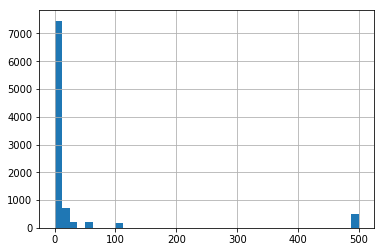

In [113]:
ndf.max_team_size.hist(bins=40)

In [128]:
ndf.max_team_size.value_counts(dropna=False)

5.00      5807
10.00     1912
1.00      1747
15.00      726
500.00     488
50.00      210
25.00      201
100.00     176
0.00       155
Name: max_team_size, dtype: int64

In [126]:
df.max_team_size.fillna(5, inplace=True)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
minmaxer = MinMaxScaler()

In [130]:
df.max_team_size = minmaxer.fit_transform(df[['max_team_size']])

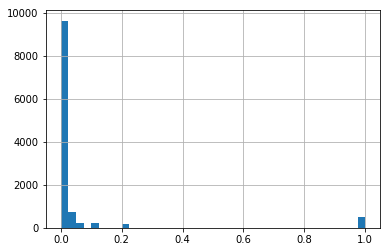

In [132]:
df.max_team_size.hist(bins=40)